In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [9]:
DATASET_ENCODING = "ISO-8859-1"
names =['target','ids','date','flag','user','text']
df = pd.read_csv('data.csv', encoding=DATASET_ENCODING, names = names)

In [10]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
df.shape

(1600000, 6)

In [12]:
df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [15]:
df.duplicated().any()

False

In [16]:
df['target'].unique()

array([0, 4], dtype=int64)

<AxesSubplot:>

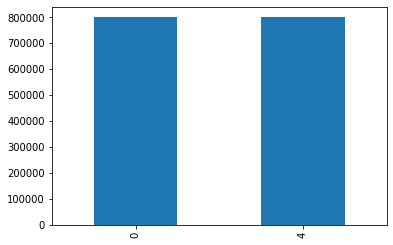

In [21]:
df['target'].value_counts().plot(kind = 'bar')

In [23]:
# To do sentiment analysis we need only two columns ie. target and text
df.drop(df.columns[1:-1], axis = 1, inplace = True)

In [24]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [25]:
df['text'].loc[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [27]:
df['text'].loc[2312]

'@x0mrsjoejonas im okay.. Im just really really missing my best friend '

### Data cleaning

In [33]:
# Every tweets are starting with username which is of no use here
# There are also some urls

# Removing the username
def remove_username_and_urls(sentence):
    new_sentence = re.sub(r'^@[^\s]+','', sentence)
    new_sentence = re.sub(r'http[^\s]+', '', new_sentence)
    
    # also lowering the all characters
    return new_sentence.lower().strip()

In [40]:
df['text'] = df['text'].apply(lambda sentence : remove_username_and_urls(sentence))

In [41]:
df.head()

,target,text
0,0,"- awww, that's a bummer. you shoulda got davi..."
1,0,is upset that he can't update his facebook by ...
2,0,i dived many times for the ball. managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am ..."


In [43]:
stop_words = stopwords.words('english')
def remove_stopwords(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in stop_words:
            new_sentence.append(word)
    return ' '.join(new_sentence)

In [46]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [47]:
df.head()

,target,text
0,0,"- awww, that's bummer. shoulda got david carr ..."
1,0,upset can't update facebook texting it... migh...
2,0,dived many times ball. managed save 50% rest g...
3,0,whole body feels itchy like fire
4,0,"no, behaving all. i'm mad. here? can't see there."


In [51]:
## Now removing all the symbols and digits from text
df['text'] = df['text'].apply(lambda x : re.sub(r'[^a-zA-Z]', ' ', x))

In [53]:
df.head()

,target,text
0,0,awww that s bummer shoulda got david carr ...
1,0,upset can t update facebook texting it migh...
2,0,dived many times ball managed save rest g...
3,0,whole body feels itchy like fire
4,0,no behaving all i m mad here can t see there


## Stemming the words

In [62]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming_words(sentence):
    word_list = []
    for word in sentence.split():
        word_list.append(stemmer.stem(word))
    return ' '.join(word_list)

In [67]:
df['text'] = df['text'].apply(lambda x : stemming_words(x))

## Train-test-split

In [85]:
df.to_csv('cleaned_data.csv')